# Lecture-03 Gradient Descent and Dymanic Programming

## Part 1 Review the online programming.

### Part 1-1 Review Gradient Descent

In [1]:
import numpy as np
from sklearn.datasets import load_boston

In [2]:
dataset = load_boston()

In [3]:
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
X, y = dataset['data'], dataset['target']

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
def draw_rm_and_price():  # rm: average number of rooms per dwelling.
    plt.scatter(X[:, 5], y)

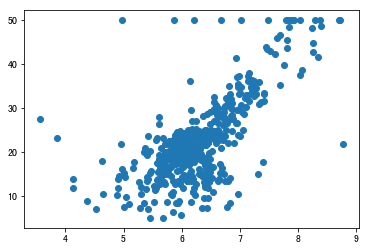

In [8]:
draw_rm_and_price()

In [37]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b

In [10]:
def loss(y, y_hat):
    """
    :param y: the real fares
    :param y_hat: the estimated fares
    :return: how good is the estimated fares
    """
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [11]:
def partial_k(X, y, y_hat):
    n = len(y)

    gradient = 0
    
    for X_i, y_i, y_hat_i in zip(list(X), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * X_i
    
    return -2 / n * gradient

def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [15]:
import random

X_rm = X[:, 5]

min_loss = float('inf')

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04

trying_times = 2000

for i in range(trying_times):
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:  # performance became better
        min_loss = current_loss
        
    if i % 100 == 0:
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))
    
    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate
    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -82.92165953826034 best_b: -49.78581678433407, and the loss is: 356399.9414530575
When time is : 100, get best_k: -31.25400185901691 best_b: -41.66324310821755, and the loss is: 68766.72380725319
When time is : 200, get best_k: -8.564356751062213 best_b: -38.09615995526327, and the loss is: 13296.820075357457
When time is : 300, get best_k: 1.3997025801538858 best_b: -36.52960343863942, and the loss is: 2599.480436863543
When time is : 400, get best_k: 5.775368542074874 best_b: -35.84157072855405, and the loss is: 536.5045214912708
When time is : 500, get best_k: 7.696912471824576 best_b: -35.53933848102718, and the loss is: 138.66077830520004
When time is : 600, get best_k: 8.540737898116562 best_b: -35.406529083400635, and the loss is: 61.936834998663684
When time is : 700, get best_k: 8.911287279845373 best_b: -35.34812111679306, and the loss is: 47.14066391246821
When time is : 800, get best_k: 9.07399926090589 best_b: -35.322386280684285, and the loss

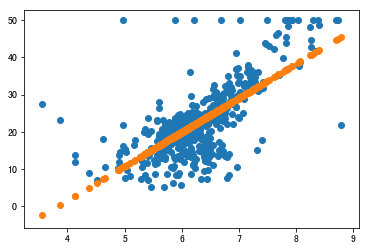

In [16]:
k = 9.201143520627612
b = -35.30068846148924
price_by_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_k_and_b)

### Part 1-2 Dymanic Programming

In [17]:
from collections import defaultdict

In [18]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

price = defaultdict(int)

for i, p in enumerate(original_price):
    price[i+1] = p
    
assert price[1] == 1

### Get the max splitting by enumerate

In [19]:
from functools import wraps

In [20]:
called_time_with_arg = defaultdict(int)

In [21]:
def get_call_times(f):
    """@param f is a function"""
    
    @wraps(f)
    def wrap(n):
        result = f(n)
        called_time_with_arg[(f.__name__, n)] += 1
        return result
    
    return wrap

In [22]:
@get_call_times
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue
    """
    return max([price[n]] + [r(i) + r(n-i) for i in range(1, n)])

In [23]:
help(r)

Help on function r in module __main__:

r(n)
    Args: n is the iron length
    Return: the max revenue



In [24]:
called_time_with_arg

defaultdict(int, {})

In [25]:
def memo(f):
    
    memo.already_computted = {}
    
    @wraps(f)
    def _wrap(arg):
        result = None
        
        if arg in memo.already_computted:
            result = memo.already_computted[arg]
        else:
            result = f(arg)
            memo.already_computted[arg] = result
            
        return result
    
    return _wrap

In [26]:
solution = {}

In [27]:
@get_call_times
@memo
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue
    """
    max_price, max_split = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    
    solution[n] = (n - max_split, max_split)
    
    return max_price

In [28]:
r(100)

316

In [29]:
called_time_with_arg

defaultdict(int,
            {('r', 1): 198,
             ('r', 2): 196,
             ('r', 3): 194,
             ('r', 4): 192,
             ('r', 5): 190,
             ('r', 6): 188,
             ('r', 7): 186,
             ('r', 8): 184,
             ('r', 9): 182,
             ('r', 10): 180,
             ('r', 11): 178,
             ('r', 12): 176,
             ('r', 13): 174,
             ('r', 14): 172,
             ('r', 15): 170,
             ('r', 16): 168,
             ('r', 17): 166,
             ('r', 18): 164,
             ('r', 19): 162,
             ('r', 20): 160,
             ('r', 21): 158,
             ('r', 22): 156,
             ('r', 23): 154,
             ('r', 24): 152,
             ('r', 25): 150,
             ('r', 26): 148,
             ('r', 27): 146,
             ('r', 28): 144,
             ('r', 29): 142,
             ('r', 30): 140,
             ('r', 31): 138,
             ('r', 32): 136,
             ('r', 33): 134,
             ('r', 34): 132,
      

In [30]:
memo.already_computted

{1: 1,
 2: 5,
 3: 8,
 4: 10,
 5: 13,
 6: 17,
 7: 18,
 8: 22,
 9: 25,
 10: 30,
 11: 35,
 12: 36,
 13: 40,
 14: 43,
 15: 45,
 16: 48,
 17: 52,
 18: 53,
 19: 57,
 20: 60,
 21: 65,
 22: 70,
 23: 71,
 24: 75,
 25: 78,
 26: 80,
 27: 83,
 28: 87,
 29: 88,
 30: 92,
 31: 95,
 32: 100,
 33: 105,
 34: 106,
 35: 110,
 36: 113,
 37: 115,
 38: 118,
 39: 122,
 40: 123,
 41: 127,
 42: 130,
 43: 135,
 44: 140,
 45: 141,
 46: 145,
 47: 148,
 48: 150,
 49: 153,
 50: 157,
 51: 158,
 52: 162,
 53: 165,
 54: 170,
 55: 175,
 56: 176,
 57: 180,
 58: 183,
 59: 185,
 60: 188,
 61: 192,
 62: 193,
 63: 197,
 64: 200,
 65: 205,
 66: 210,
 67: 211,
 68: 215,
 69: 218,
 70: 220,
 71: 223,
 72: 227,
 73: 228,
 74: 232,
 75: 235,
 76: 240,
 77: 245,
 78: 246,
 79: 250,
 80: 253,
 81: 255,
 82: 258,
 83: 262,
 84: 263,
 85: 267,
 86: 270,
 87: 275,
 88: 280,
 89: 281,
 90: 285,
 91: 288,
 92: 290,
 93: 293,
 94: 297,
 95: 298,
 96: 302,
 97: 305,
 98: 310,
 99: 315,
 100: 316}

In [31]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (11, 0),
 12: (11, 1),
 13: (11, 2),
 14: (11, 3),
 15: (13, 2),
 16: (14, 2),
 17: (11, 6),
 18: (17, 1),
 19: (17, 2),
 20: (17, 3),
 21: (11, 10),
 22: (11, 11),
 23: (22, 1),
 24: (22, 2),
 25: (22, 3),
 26: (24, 2),
 27: (25, 2),
 28: (22, 6),
 29: (28, 1),
 30: (28, 2),
 31: (28, 3),
 32: (22, 10),
 33: (22, 11),
 34: (33, 1),
 35: (33, 2),
 36: (33, 3),
 37: (35, 2),
 38: (36, 2),
 39: (33, 6),
 40: (39, 1),
 41: (39, 2),
 42: (39, 3),
 43: (33, 10),
 44: (33, 11),
 45: (44, 1),
 46: (44, 2),
 47: (44, 3),
 48: (46, 2),
 49: (47, 2),
 50: (44, 6),
 51: (50, 1),
 52: (50, 2),
 53: (50, 3),
 54: (44, 10),
 55: (44, 11),
 56: (55, 1),
 57: (55, 2),
 58: (55, 3),
 59: (57, 2),
 60: (58, 2),
 61: (55, 6),
 62: (61, 1),
 63: (61, 2),
 64: (61, 3),
 65: (55, 10),
 66: (55, 11),
 67: (66, 1),
 68: (66, 2),
 69: (66, 3),
 70: (68, 2),
 71: (69, 2),
 72: (66, 6),


In [32]:
def parse_solution(n):
    
    left_split, right_split = solution[n]
    
    if right_split == 0:
        return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [33]:
parse_solution(20)

[11, 6, 3]

## Part 2: Change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [45]:
def loss_abs(y, y_hat):
    """
    :param y: the real fares
    :param y_hat: the estimated fares
    :return: how good is the estimated fares
    """
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [46]:
def partial_k_abs(X, y, y_hat):
    n = len(y)

    gradient = 0
    
    for X_i, y_i, y_hat_i in zip(list(X), list(y), list(y_hat)):
        if y_i - y_hat_i > 0:
            gradient += -1 * X_i    
        elif y_i - y_hat_i < 0:
            gradient += X_i
        else:
            pass
    
    return 1 / n * gradient

def partial_b_abs(X, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
        if y_i - y_hat_i > 0:
            gradient -= 1   
        elif y_i - y_hat_i < 0:
            gradient += 1
        else:
            pass
    
    return 1 / n * gradient

In [47]:
X_rm = X[:, 5]

min_loss = float('inf')

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04

trying_times = 2000

for i in range(trying_times):
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss_abs(y, price_by_k_and_b)
    
    if current_loss < min_loss:  # performance became better
        min_loss = current_loss
        
    if i % 100 == 0:
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))
    
    k_gradient = partial_k_abs(X_rm, y, price_by_k_and_b)
    b_gradient = partial_b_abs(X_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate
    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -4.164526906494132 best_b: 84.93108494026086, and the loss is: 36.236506014018865
When time is : 100, get best_k: -4.226459258272811 best_b: 85.2832629977195, and the loss is: 36.201392303303784
When time is : 200, get best_k: -4.288285681197749 best_b: 85.6350871105382, and the loss is: 36.16679393152863
When time is : 300, get best_k: -4.349898940091056 best_b: 85.98657214565213, and the loss is: 36.13359161874268
When time is : 400, get best_k: -4.411397418351947 best_b: 86.33771797594206, and the loss is: 36.100979453460305
When time is : 500, get best_k: -4.472895896612838 best_b: 86.68850855448623, and the loss is: 36.06801765306062
When time is : 600, get best_k: -4.534394374873728 best_b: 87.03894031112469, and the loss is: 36.034702703828856
When time is : 700, get best_k: -4.595879575664264 best_b: 87.3890112336008, and the loss is: 36.00114268070465
When time is : 800, get best_k: -4.657046117166275 best_b: 87.73876542867262, and the loss is: 35

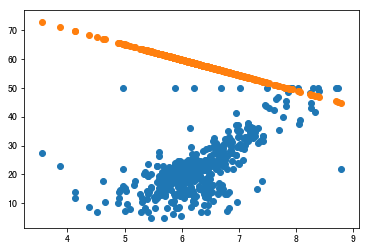

In [48]:
k = -5.32151544641544
b = 91.5648900450892
price_by_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_k_and_b)

感觉好像不太对？？？

## Part 3: Finish the Solution Parse Part of Edit-Distance

In [49]:
solution = {}

In [50]:
from functools import lru_cache

@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    print(candidates)
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [51]:
def parse_solution_ed(n):
    
    pass
# I have no idea.

### Part 5-1: Review machine learning

#### 1. Why do we use Derivative / Gredient to fit a target function?

Ans:

使用梯度下降可以对权值进行小范围的迭代更新，然而小范围更新的方向为损失函数对权值选择点的导数负方向，这样就能保证损失函数逐渐取得最小值。

#### 2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?

Ans:

梯度的本意是一个向量（矢量），表示某一函数在该点处的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向（此梯度的方向）变化最快，变化率最大（为该梯度的模）。

梯度下降：让梯度中所有偏导函数都下降到最低点的过程。

#### 3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:

第一种方法：在一定范围内，任意选择k和b的值带入到损失函数中，哪个损失函数值最小就取谁。有着很强的随机性。

第二种方法：随机初始化k和b的值，选取四个方向，带入损失函数中，如果loss变小，则选取该方向。虽然可以逐步降低loss，但是方向的选择仍然带有随机性。

第三种方法：随机初始化k和b的值，采用梯度下降方法，实际上降低loss的小方向是被确定了。

#### 4. Using the simple words to describe: What's the machine leanring.

Ans:

简单的说，机器学习就是试图找到一个函数的方法，这个函数可以拟合训练数据、测试数据和新数据。

## Part 5-2: Answer following questions: 

#### 1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problem? 

Ans:

动态规划是帮助我们解决一些有着重复的子问题的一种方法。

而搜索问题可能需要遍历所有的子情况才可能得出结果。

#### 2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans:

动态规划可以为我们解决一些规模始终且不是很大的一些问题。

这时候，如果使用机器学习来解决这些问题，似乎有种杀鸡焉用牛刀的感觉。

还有一个前提在于，机器学习需要一定规模的数据量，才能有效地解决问题。

#### 3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans:

1.背包问题
2.最长公共子序列
3.最短路径问题

#### 4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans:

1.DNA分析
2.拼字检查
3.语音辨识
4.抄袭侦测
5.相似度计算

#### 5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans:

任何思想方法都有一定的局限性，超出了特定条件，它就失去了作用。同样，动态规划也并不是万能的。适用动态规划的问题必须满足最优化原理和无后效性。

1.最优化原理（最优子结构性质）：一个最优化策略具有这样的性质，不论过去状态和决策如何，对前面的决策所形成的状态而言，余下的诸决策必须构成最优策略。简而言之，一个最优化策略的子策略总是最优的。一个问题满足最优化原理又称其具有最优子结构性质。

2.无后效性：是将各阶段按照一定的次序排列好之后，对于某个给定的阶段状态，它以前各阶段的状态无法直接影响它未来的决策，而只能通过当前的这个状态。换句话说，每个状态都是过去历史的一个完整总结。又称无后向性。

3.子问题的重叠性：动态规划将原来具有指数级时间复杂度的搜索算法改进成了具有多项式时间复杂度的算法。其中的关键在于解决冗余，这是动态规划算法的根本目的。动态规划实质上是一种以空间换时间的技术，它在实现的过程中，不得不存储产生过程中的各种状态，所以它的空间复杂度要大于其它的算法。

#### 6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:

1.没有统一的标准模型。

2.数值方法求解时存在维数灾难。

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [52]:
import random

In [53]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

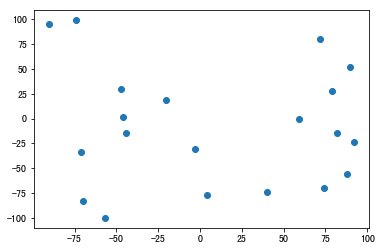

In [54]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [55]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

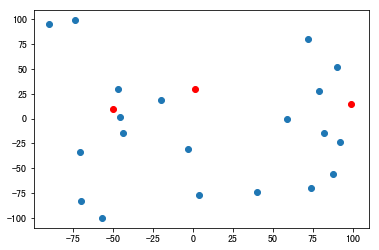

In [56]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

In [57]:
points = {}
points[0] = chosen_p
for i, (lat, long) in enumerate(zip(latitudes, longitude), start=1):
    points[i] = (lat, long)

In [58]:
points

{0: (-50, 10),
 1: (88, -56),
 2: (-47, 30),
 3: (92, -24),
 4: (72, 80),
 5: (4, -77),
 6: (-71, -34),
 7: (59, 0),
 8: (90, 52),
 9: (82, -15),
 10: (-90, 95),
 11: (79, 28),
 12: (-20, 19),
 13: (-57, -100),
 14: (-70, -83),
 15: (74, -70),
 16: (-74, 99),
 17: (-3, -31),
 18: (-46, 2),
 19: (40, -74),
 20: (-44, -15)}

In [59]:
import math

def get_distance(p1, p2):
    
    lat1, lon1 = points[p1]
    lat2, lon2 = points[p2]
    
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [60]:
get_distance(0, 1)

15473.055845055867

In [61]:
def walk_shortest(start):
    
    visited = [start]
    
    seen = set()
    seen.add(start)
    while len(points) != len(seen):
        
        short = (_, float('inf'))
        for k, v in points.items():
            
            if k in seen:
                continue

            d = get_distance(start, k)
            if d < short[1]:
                short = (k, d)
                
        visited += [short[0]]
        start = short[0]
        seen.add(short[0])
    
    return visited

In [62]:
v1 = walk_shortest(start=0)

In [63]:
v1

[0, 18, 20, 6, 14, 13, 10, 16, 2, 12, 17, 5, 19, 15, 9, 1, 8, 3, 11, 4, 7]

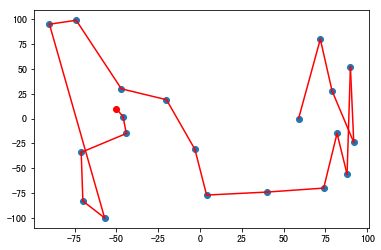

In [64]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
for i in range(len(v1)-1):
    plt.plot((points[v1[i]][0], points[v1[i+1]][0]), (points[v1[i]][1], points[v1[i+1]][1]), color='r')

# Question

Part 2感觉写得不对，不知道是不是求导求错了。

Part 3也没有思路。

Optinal的最短路径也不对，是按当前点的最近距离计算的。